In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lib import transform
from importlib import reload
import matplotlib.pyplot as plt

In [2]:
reload(transform)

<module 'lib.transform' from '/home/gil/Documentos/Semestre_2020_2/Data_Mining/Atividade6/lib/transform.py'>

In [3]:
data = pd.read_csv('housing.csv', na_values='?')

In [4]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [5]:
#não possui dados nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [6]:
data.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

#### Divisão dos dados de treino e teste

In [7]:
X = data.drop(['MEDV'],axis=1).values

In [8]:
y = data['MEDV'].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Treinamento do modelo com os dados sem transformação

In [10]:
model = LinearRegression().fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)

In [12]:
mse(y_test, y_pred)

7048219280.217675

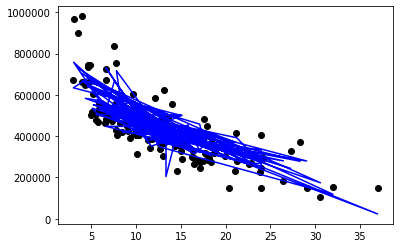

In [13]:
plt.scatter(X_test[:,1], y_test,  color='black')
plt.plot(X_test[:,1], y_pred, color='blue')

#### Transformando os dados com a biblioteca implementada

In [14]:
#Z-score normalization
Z = transform.Z_score()

In [15]:
Z_xtrain = Z.fit_transform(X_train)
Z_xtest = Z.transform(X_test)

In [16]:
#min-max
MM = transform.min_max()

In [17]:
MM_xtrain = MM.fit_transform(X_train)
MM_xtest = MM.transform(X_test)

In [18]:
MM_xtrain.shape, MM_xtest.shape, Z_xtrain.shape, Z_xtest.shape

((342, 3), (147, 3), (342, 3), (147, 3))

#### Treinando novamente o modelo com os dados tranformados

In [19]:
model_Z = LinearRegression().fit(Z_xtrain, y_train)
model_MM = LinearRegression().fit(MM_xtrain, y_train)

In [20]:
y_pred_Z = model.predict(Z_xtest)
y_pred_MM = model.predict(MM_xtest)

In [21]:
mse(y_test, y_pred_Z)

16903215897.438198

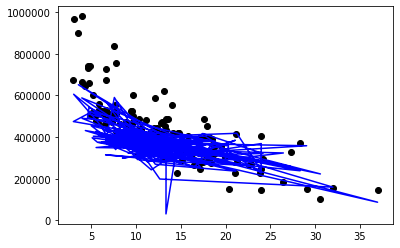

In [22]:
plt.scatter(X_test[:,1], y_test,  color='black')
plt.plot(X_test[:,1], y_pred_Z, color='blue')

In [23]:
mse(y_test, y_pred_MM)

20537066093.83783

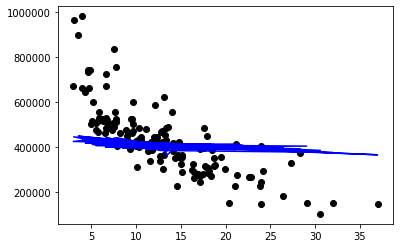

In [24]:
plt.scatter(X_test[:,1], y_test,  color='black')
plt.plot(X_test[:,1], y_pred_MM, color='blue')